In [39]:
# Handle necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')

In [41]:
# Sample training data
train.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,...,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,...,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,...,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


In [42]:
train.describe()

,click,weekday,hour,logtype,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.697738e+06,2.697738e+06,2.697738e+06,2697738.0,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06
mean,7.539650e-04,2.891155e+00,1.346598e+01,1.0,1.494494e+02,1.543936e+02,5.756453e+02,1.888990e+02,2.648484e+01,2.724582e+02,8.025102e+01,2.847232e+03
std,2.744807e-02,2.053776e+00,6.592290e+00,0.0,1.020496e+02,1.032899e+02,3.212459e+02,1.308906e+02,3.703962e+01,2.910801e+01,6.236699e+01,7.821371e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,1.0,7.900000e+01,7.900000e+01,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.0,1.460000e+02,1.520000e+02,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,7.000000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,1.0,2.160000e+02,2.220000e+02,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,1.010000e+02,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,1.0,3.950000e+02,3.990000e+02,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697738 entries, 0 to 2697737
Data columns (total 26 columns):
click             int64
weekday           int64
hour              int64
bidid             object
logtype           int64
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(12), object(14)
memory usage: 535.1+ MB


In [44]:
# Look at the dataset fields
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

# <span style="color:blue">Data Exploration</span>. 

# 1. Basic Statistics

In [45]:
# Dataset statistics
dataset_stats = pd.DataFrame()
dataset_stats['advertiser'] = np.sort(train.advertiser.unique())
dataset_stats['impressions'] = train.groupby('advertiser').size().values
click = train.groupby('advertiser').click.value_counts()
dataset_stats['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
temp = train.groupby('advertiser').payprice.sum().values
dataset_stats['cost'] = (temp/1000).round()
dataset_stats['CTR'] = (((dataset_stats.clicks / dataset_stats.impressions) * 100).round(3)).astype(str) + '%'
dataset_stats['CPM'] = (((dataset_stats.cost / dataset_stats.impressions)*1000).round(2)).astype(str)
dataset_stats['eCPC'] = ((dataset_stats.cost / dataset_stats.clicks).round(2)).astype(str)

dataset_stats

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,540293,451,37231.0,0.083%,68.91,82.55
1,2259,146778,45,13649.0,0.031%,92.99,303.31
2,2261,120619,37,10789.0,0.031%,89.45,291.59
3,2821,231416,144,20626.0,0.062%,89.13,143.24
4,2997,54487,251,3413.0,0.461%,62.64,13.6
5,3358,304782,233,28145.0,0.076%,92.34,120.79
6,3386,498554,358,38341.0,0.072%,76.9,107.1
7,3427,454031,340,36820.0,0.075%,81.1,108.29
8,3476,346778,175,27481.0,0.05%,79.25,157.03


# 2. User feedback analysis

In [46]:
# 1. Analyzing CTR per day of the week

daily_CTR = pd.DataFrame()
daily_CTR['day'] = np.sort(train.weekday.unique())

click = train.groupby('weekday').click.value_counts()

imp_1458 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','weekday']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
daily_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
daily_CTR['clicks_3358'] = clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values

daily_CTR['CTR_1458'] = ((daily_CTR.clicks_1458 / daily_CTR.imps_1458) ).round(5)
daily_CTR['CTR_3358'] = ((daily_CTR.clicks_3358 / daily_CTR.imps_3358) ).round(5)

a = np.mean(daily_CTR['CTR_1458'])
b = np.mean(daily_CTR['CTR_3358'])

daily_CTR['std_CTR_1458'] = np.sqrt( 3.5 * (daily_CTR['CTR_1458'] - a)**2 )
daily_CTR['std_CTR_3358'] = np.sqrt((daily_CTR['CTR_3358'] - b)**2 )


In [47]:
(daily_CTR['CTR_1458'] - 0.00083)**2

0    1.600000e-09
1    1.600000e-09
2    4.000000e-10
3    3.600000e-09
4    1.210000e-08
5    0.000000e+00
6    1.960000e-08
Name: CTR_1458, dtype: float64

In [48]:
daily_CTR

,day,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358,std_CTR_1458,std_CTR_3358
0,0,83994,33238,66,21,0.00079,0.00063,0.000088,0.000063
1,1,72204,30707,63,11,0.00087,0.00036,0.000061,0.000333
2,2,73810,26206,63,14,0.00085,0.00053,0.000024,0.000163
3,3,76509,81073,68,79,0.00089,0.00097,0.000099,0.000277
4,4,76835,41414,72,39,0.00094,0.00094,0.000192,0.000247
5,5,78485,58888,65,50,0.00083,0.00085,0.000013,0.000157
6,6,78456,33256,54,19,0.00069,0.00057,0.000275,0.000123


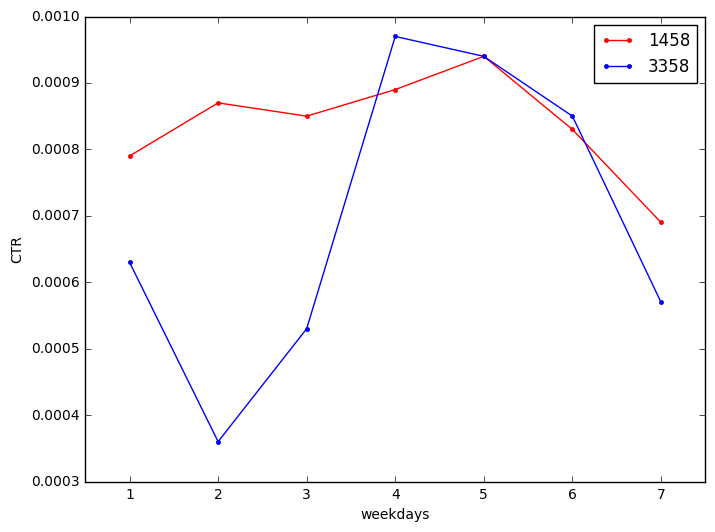

In [49]:
# Line plot of CTR per day of the week for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_1458.values, marker = '.',color = 'red', label='1458')
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_3358.values,marker='.', label='3358')

plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(8,6)
plt.draw()
plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


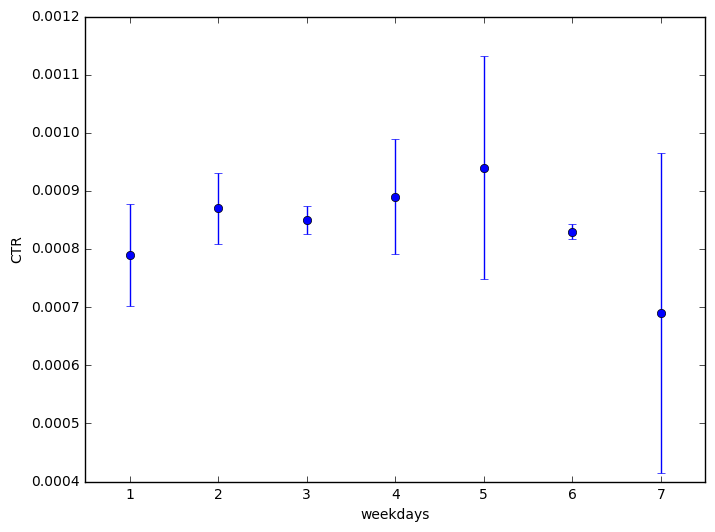

In [50]:
# Line plot of CTR per day of the week for advertiser 1458 & 3358
f, ax = plt.subplots(1)
x = 1+daily_CTR.day.values
y = daily_CTR.CTR_1458.values
yerr = daily_CTR['std_CTR_1458']
ax.errorbar(x, y, yerr=yerr, fmt='o')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(8,6)


plt.draw()
plt.show()




In [51]:
# 2. Analyzing CTR per hour
hourly_CTR = pd.DataFrame()

hourly_CTR['hour'] = np.sort(train.hour.unique())

imp_1458 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','hour']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
hourly_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
click3358 = list(clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values)
click3358 = click3358[:4] + [0] + click3358[4:]
hourly_CTR['clicks_3358'] = click3358

hourly_CTR['CTR_1458'] = ((hourly_CTR.clicks_1458 / hourly_CTR.imps_1458) ).round(5)
hourly_CTR['CTR_3358'] = ((hourly_CTR.clicks_3358 / hourly_CTR.imps_3358) ).round(5)

In [52]:
hourly_CTR

,hour,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,25499,72359,23,70,0.00090,0.00097
1,1,11251,7583,8,8,0.00071,0.00105
2,2,6811,3527,14,2,0.00206,0.00057
3,3,7189,1447,6,2,0.00083,0.00138
4,4,3580,1307,6,0,0.00168,0.00000
5,5,4292,1103,4,1,0.00093,0.00091
6,6,5138,2797,2,4,0.00039,0.00143
7,7,10675,2835,5,1,0.00047,0.00035
8,8,15682,7960,9,6,0.00057,0.00075
9,9,19621,4700,18,1,0.00092,0.00021


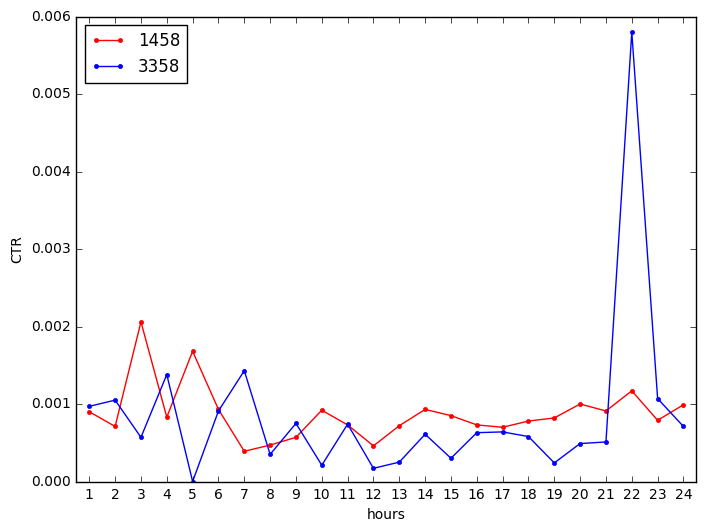

In [53]:
# Line plot of CTR per hour for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_1458.values, marker = '.',color = 'red', label='1458')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3358.values,marker='.', label='3358')
plt.xticks(1+hourly_CTR.hour.values)
plt.legend(loc=2)
plt.ylabel('CTR')
plt.xlabel('hours')
ax.set_xlim(xmin = 0.5 , xmax = 24.5)
f.set_size_inches(8,6)
plt.draw()
plt.show()

In [54]:
# 3. Analyzing CTR per region
region_CTR = pd.DataFrame()

region_CTR['region'] = np.sort(train.region.unique())

imp_1458 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','region']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
region_CTR['clicks_1458'] = clickall_1458.groupby(level='region').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
region_CTR['clicks_3358'] = clickall_3358.groupby(level='region').sum().values

region_CTR['CTR_1458'] = ((region_CTR.clicks_1458 / region_CTR.imps_1458) ).round(5)
region_CTR['CTR_3358'] = ((region_CTR.clicks_3358 / region_CTR.imps_3358) ).round(5)

In [55]:
region_CTR

,region,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,7844,6162,9,13,0.00115,0.00211
1,1,23389,12157,17,6,0.00073,0.00049
2,2,8875,4820,3,2,0.00034,0.00041
3,3,27398,13246,20,15,0.00073,0.00113
4,15,16674,7968,18,7,0.00108,0.00088
5,27,7616,3754,5,3,0.00066,0.00080
6,40,20449,8965,9,6,0.00044,0.00067
7,55,12091,4823,11,2,0.00091,0.00041
8,65,12566,5684,11,5,0.00088,0.00088
9,79,14300,9523,17,9,0.00119,0.00095


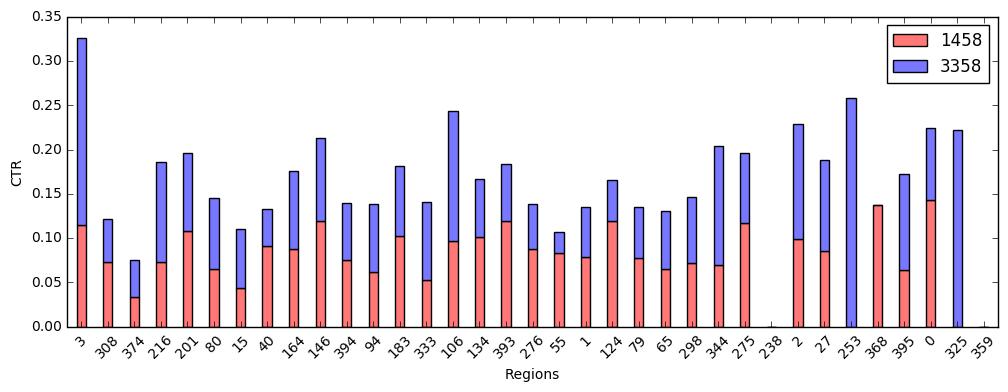

In [142]:
dataframes = []
df = None
for adv in advs:
    df = train[train['advertiser'] == adv]
    ctr = df.groupby('region').agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    dataframes.append(ctr)
    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
x = np.arange(len(df.region.unique()))
width = 0.35

p1 = ax.bar(x, dataframes[0]['ctr'], width, color="#FF7777", label=str(advs[0]))
p2 = ax.bar(x, dataframes[1]['ctr'], width, color="#7777FF", bottom=dataframes[0]['ctr'], label=str(advs[1]))
ax.set_xlabel('Regions')
ax.set_ylabel('CTR')
ax.margins(x=0.01)
ax.set_xticks(x + width/2.)
ax.legend()
l = list(df.region.unique())
l.sort
ax.set_xticklabels(l, rotation=45)

plt.show()

In [58]:
region_CTR[['region','CTR_1458','CTR_3358']]

,region,CTR_1458,CTR_3358
0,0,0.00115,0.00211
1,1,0.00073,0.00049
2,2,0.00034,0.00041
3,3,0.00073,0.00113
4,15,0.00108,0.00088
5,27,0.00066,0.00080
6,40,0.00044,0.00067
7,55,0.00091,0.00041
8,65,0.00088,0.00088
9,79,0.00119,0.00095


In [61]:
# 4. Analyzing CTR per ad exchange
adexchange_CTR = pd.DataFrame()

adexchange_CTR['ad_exchange'] = np.sort(train.adexchange.unique())
adexchange_CTR = adexchange_CTR.drop([3,4])
imp_1458 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','adexchange']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_1458'] = clickall_1458.groupby(level='adexchange').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_3358'] = clickall_3358.groupby(level='adexchange').sum().values

adexchange_CTR['CTR_1458'] = ((adexchange_CTR.clicks_1458 / adexchange_CTR.imps_1458) ).round(5)
adexchange_CTR['CTR_3358'] = ((adexchange_CTR.clicks_3358 / adexchange_CTR.imps_3358) ).round(5)

In [62]:
adexchange_CTR

,ad_exchange,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,1,182219,159379,146,146,0.00080,0.00092
1,2,160460,93691,126,48,0.00079,0.00051
2,3,197614,51712,179,39,0.00091,0.00075


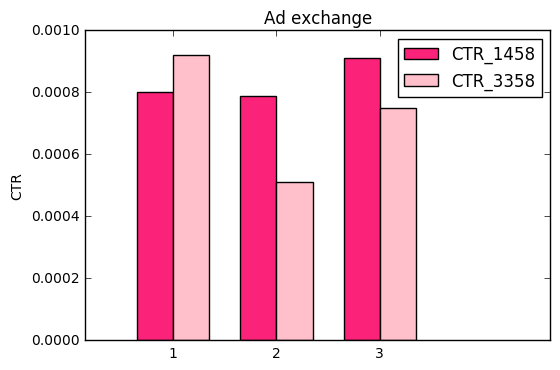

In [65]:
N = 3
CTR_1458 = (0.00080,0.00079, 0.00091)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, CTR_1458, width, color='#FA2379')

CTR_3358 = (0.00092,0.00051,0.00075)
rects2 = ax.bar(ind + width, CTR_3358, width, color='pink')

# add some text for labels, title and axes ticks
ax.set_ylabel('CTR')
ax.set_title('Ad exchange')
ax.set_xticks(ind + width )
ax.set_xticklabels(('1', '2', '3'))
ax.set_xlim(-0.5, 4.0)

ax.legend((rects1[0], rects2[0]), ('CTR_1458', 'CTR_3358'))
plt.show()

In [66]:
# 4. Analyzing CTR per user agent
useragent_CTR = pd.DataFrame()

useragent_CTR['useragent'] = np.sort(train.useragent.unique())
useragent_CTR = useragent_CTR.drop([12,18,25])
imp_1458 = train.groupby('useragent').advertiser.value_counts()
useragent_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('useragent').advertiser.value_counts()
imp_3358 = list(imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values)
imp_3358 = imp_3358[:22] + [0] + imp_3358[22:]
useragent_CTR['imps_3358'] = imp_3358

click = train.groupby(['advertiser','useragent']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
useragent_CTR['clicks_1458'] = clickall_1458.groupby(level='useragent').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
clickall_3358 = list(clickall_3358.groupby(level='useragent').sum().values)
clickall_3358 = clickall_3358[:22] + [0] + clickall_3358[22:]
useragent_CTR['clicks_3358'] = clickall_3358

useragent_CTR['CTR_1458'] = ((useragent_CTR.clicks_1458 / useragent_CTR.imps_1458) ).round(5)
useragent_CTR['CTR_3358'] = ((useragent_CTR.clicks_3358 / useragent_CTR.imps_3358) ).round(5)

In [67]:
useragent_CTR.fillna(0.0)

,useragent,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,android_chrome,74,101,1,1,0.01351,0.00990
1,android_firefox,5,4,0,0,0.00000,0.00000
2,android_ie,3,2,0,0,0.00000,0.00000
3,android_maxthon,6,5,0,0,0.00000,0.00000
4,android_opera,96,145,0,0,0.00000,0.00000
5,android_other,243,233,2,1,0.00823,0.00429
6,android_safari,3044,3813,17,15,0.00558,0.00393
7,android_sogou,1,1,0,0,0.00000,0.00000
8,ios_other,3,4,0,0,0.00000,0.00000
9,ios_safari,101,65,0,1,0.00000,0.01538


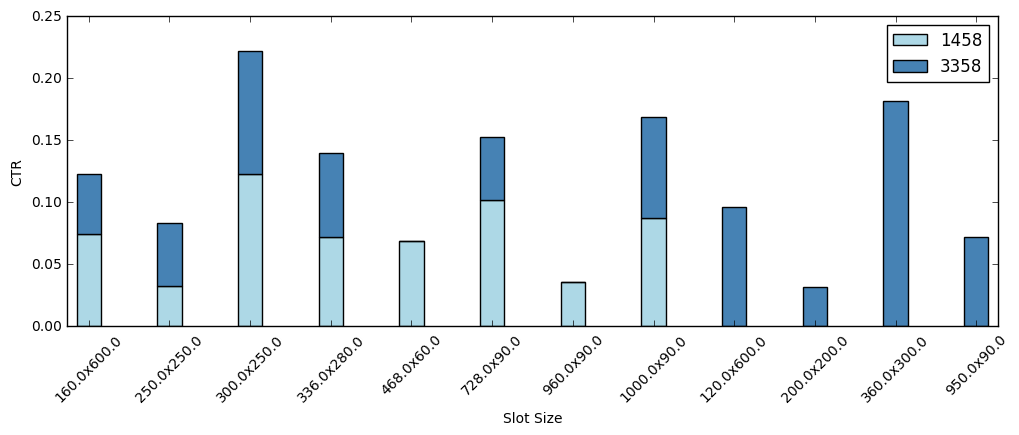

In [139]:
advs = [1458, 3358]
dataframes = []
df = None
for adv in advs:
    df = train[train['advertiser'] == adv]
    ctr = df.groupby(('slotwidth','slotheight'), as_index=False).agg({'click':{'click':sum}, 'bidid': {'imps' : 'count'}})
    ctr.columns = ctr.columns.droplevel(0)
    ctr['ctr'] = (ctr.click / ctr.imps) * 100
    ctr.columns = ['slotwidth','slotheight','imps','click','ctr']
    dataframes.append(ctr)

new_df = pd.merge(dataframes[0], dataframes[1], how='outer', on=['slotwidth','slotheight'])
new_df = new_df.fillna(0)

labels = list(new_df[['slotwidth','slotheight']].values)
labels_str = [str(l[0]) + 'x' + str(l[1]) for l in labels]
labels_str

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
x = np.arange(len(new_df.slotwidth))
width = 0.3

p1 = ax.bar(x, new_df['ctr_x'], width, color= "lightblue", label=advs[0])
p2 = ax.bar(x, new_df['ctr_y'], width, color="steelblue", bottom=new_df['ctr_x'], label=advs[1])
ax.set_xlabel('Slot Size')
ax.set_ylabel('CTR')
ax.margins(x=0.01)
ax.set_xticks(x + width/2.)
ax.legend()
ax.set_xticklabels(labels_str, rotation=45)

plt.show()

# <span style="color:blue">Basic Bidding Strategies</span>. 

# 1. Constant bidding

In [69]:
def constant_bidding(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    
    for click, pay_price in validation[['click','payprice']].values:
            if constant > pay_price:
                impression += 1.0
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

const = pd.DataFrame()
const['constants'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for con in const['constants']:
    [imps, clicks, cost] = constant_bidding(con)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
const['imps_won'] = im
const['total_spend'] = ct
const['clicks'] = clks
const['CTR'] = (const.clicks/const.imps_won * 100).round(2).astype(str)
const['CPM'] = (const.total_spend/const.imps_won * 1000).round(2).astype(str)
const['CPC'] = (const.total_spend/const.clicks).round(2).astype(str)

In [70]:
def constant_bidding(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
        
    for click, pay_price in validation[['click','payprice']].values:
            if constant > pay_price:
                impression += 1
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

const = pd.DataFrame()
const['constants'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for con in const['constants']:
    [imps, clicks, cost] = constant_bidding(con)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
const['imps_won'] = im
const.imps_won = const.imps_won.astype(int)
const['total_spend'] = ct
const['clicks'] = clks
const['CTR'] = (const.clicks/const.imps_won).round(7).astype(str)
const['CPM'] = (const.total_spend/const.imps_won * 1000).round(2).astype(str)
const['CPC'] = (const.total_spend/const.clicks).round(2).astype(str)

In [71]:
const

,constants,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,360,289.0,0,0.0,802.78,inf
1,4,882,1417.0,0,0.0,1606.58,inf
2,6,7646,33986.0,1,0.0001308,4444.94,33986.0
3,8,10850,54653.0,8,0.0007373,5037.14,6831.62
4,10,13364,76078.0,8,0.0005986,5692.76,9509.75
5,12,17913,123515.0,8,0.0004466,6895.27,15439.38
6,14,21058,162741.0,10,0.0004749,7728.23,16274.1
7,16,24081,206522.0,11,0.0004568,8576.14,18774.73
8,18,28559,280440.0,12,0.0004202,9819.67,23370.0
9,20,32248,348357.0,13,0.0004031,10802.44,26796.69


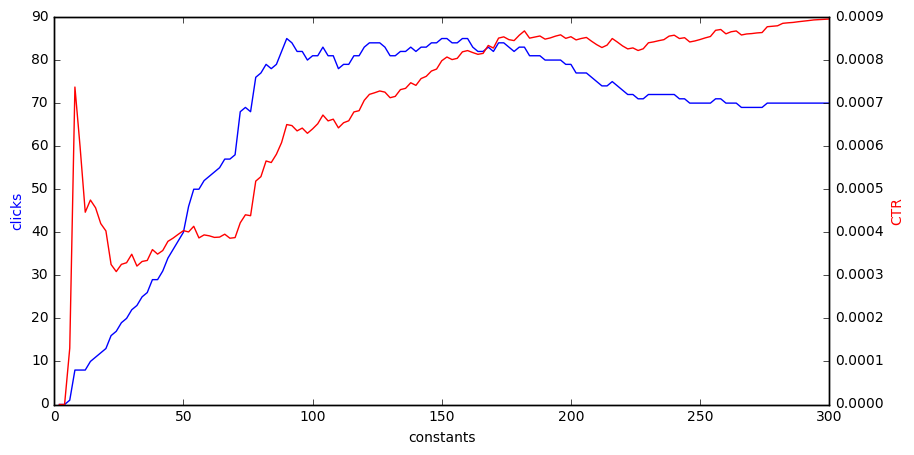

In [72]:
b = const[['clicks','constants']]
a = const[['constants','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.constants,b.clicks)
ax1.set_xlabel('constants')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.constants, a.CTR,color='red')
ax2.set_ylabel('CTR', color='red')
fig.set_size_inches(10, 5)
fig.savefig('constant.PNG', dpi=200)
plt.show()

# 2. Random bidding

In [73]:
from random import randrange

def random_bidding(upper_bound):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 25000
    
    for click,pay_price in validation[['click','payprice']].values:  
        rand_no = randrange(upper_bound)
        if rand_no > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
                break
    return impression, clicks, cost
            
randm = pd.DataFrame()
randm['upper_bound'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for upper in randm['upper_bound']:
    [imps, clicks, cost] = random_bidding(upper)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
randm['imps_won'] = im
randm['total_spend'] = ct
randm['clicks'] = clks
randm['CTR'] = (randm.clicks/const.imps_won * 100).round(2).astype(str)
randm['CPM'] = (randm.total_spend/randm.imps_won * 1000).round(2).astype(str)
randm['CPC'] = (randm.total_spend/randm.clicks).round(2).astype(str)

In [76]:
from random import randrange

def random_bidding(upper_bound):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    
    for click,pay_price in validation[['click','payprice']].values:  
        rand_no = randrange(upper_bound)
        if rand_no > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
                break
    return impression, clicks, cost
            
randm = pd.DataFrame()
randm['upper_bound'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for upper in randm['upper_bound']:
    [imps, clicks, cost] = random_bidding(upper)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
randm['imps_won'] = im
randm.imps_won = randm.imps_won.astype(int)
randm['total_spend'] = ct
randm['clicks'] = clks
randm['CTR'] = (randm.clicks/randm.imps_won ).round(7).astype(str)
randm['CPM'] = (randm.total_spend/randm.imps_won * 1000).round(2).astype(str)
randm['CPC'] = (randm.total_spend/randm.clicks).round(2).astype(str)

In [77]:
randm

,upper_bound,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,37,0.0,0,0.0,0.0,nan
1,4,289,347.0,0,0.0,1200.69,inf
2,6,713,1563.0,0,0.0,2192.15,inf
3,8,2648,10857.0,1,0.0003776,4100.08,10857.0
4,10,4487,21032.0,4,0.0008915,4687.32,5258.0
5,12,6189,32610.0,4,0.0006463,5269.03,8152.5
6,14,7882,46051.0,2,0.0002537,5842.55,23025.5
7,16,9800,63167.0,3,0.0003061,6445.61,21055.67
8,18,11479,81323.0,6,0.0005227,7084.5,13553.83
9,20,13110,101511.0,6,0.0004577,7743.02,16918.5


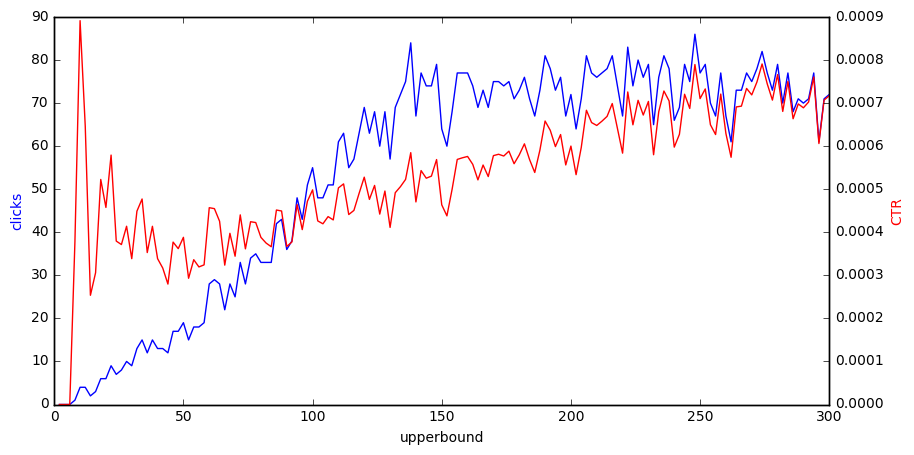

In [78]:
b = randm[['clicks','upper_bound']]
a = randm[['upper_bound','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.upper_bound,b.clicks)
ax1.set_xlabel('upperbound')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.upper_bound, a.CTR,color='red')
ax2.set_ylabel('CTR', color='red')
fig.set_size_inches(10, 5)
fig.savefig('random.PNG', dpi=100)
plt.show()

# <span style="color:blue">Feature Engineering</span> 

In [81]:
#1.encode weekdays
def encode_days(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.weekday,prefix='day')],axis=1)
    dataframe = dataframe.drop('weekday',axis=1)
    return dataframe

In [82]:
#2.encode hour
def encode_hours(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.hour,prefix='hour')],axis=1)
    dataframe = dataframe.drop('hour',axis=1)
    return dataframe

In [83]:
#3.encode region
def encode_region(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.region,prefix='region')],axis=1)
    dataframe = dataframe.drop('region',axis=1)
    return dataframe

In [84]:
#4.encode adexchange
def encode_adexchange(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.adexchange,prefix='adexchange')],axis=1)
    dataframe = dataframe.drop('adexchange',axis=1)
    return dataframe

In [85]:
#5.encode slotwidth
def encode_slotwidth(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotwidth,prefix='slotwidth')],axis=1)
    dataframe = dataframe.drop('slotwidth',axis=1)
    return dataframe

In [86]:
#6.encode slotheight
def encode_slotheight(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotheight,prefix='slotheight')],axis=1)
    dataframe = dataframe.drop('slotheight',axis=1)
    return dataframe

In [87]:
#7.encode advertiser
def encode_advertiser(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.advertiser,prefix='advertiser')],axis=1)
    dataframe = dataframe.drop('advertiser',axis=1)
    return dataframe

In [88]:
#8.encode slotvisibility
def encode_slotvisibility(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotvisibility,prefix='slotvisibility')],axis=1)
    dataframe = dataframe.drop('slotvisibility',axis=1)
    return dataframe

In [89]:
#9.encode slotformat
def encode_slotformat(dataframe):
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotformat,prefix='slotformat')],axis=1)
    dataframe = dataframe.drop('slotformat',axis=1)
    return dataframe

In [90]:
#10.encode OS_browser
def encode_os_browser(dataframe):
    df_temp = pd.DataFrame(dataframe.useragent.str.split('_',1).tolist(), columns = ['OS','browser'])
    dataframe = pd.concat([dataframe,df_temp],axis=1)
    dataframe = dataframe.drop('useragent',axis=1)
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.OS,prefix='OS')],axis=1)
    dataframe = dataframe.drop('OS',axis=1)
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.browser,prefix='browser')],axis=1)
    dataframe = dataframe.drop('browser',axis=1)
    return dataframe

In [91]:
# 11. encode slotprice into 5 ranges
def encode_slotprice(dataframe):
    slotprice_range = pd.DataFrame()
    slotprice_range['slotprices'] = pd.cut(dataframe.slotprice.values,5, labels=[1,2,3,4,5])
    dataframe = pd.concat([dataframe,slotprice_range],axis=1)
    dataframe = pd.concat([dataframe,pd.get_dummies(dataframe.slotprices,prefix='slotprice')],axis=1)
    dataframe = dataframe.drop('slotprice',axis=1)
    dataframe = dataframe.drop('slotprices',axis=1)
    return dataframe

In [92]:
#12.encode usertag
def encode_usertags(dataframe):
    usertags = list(dataframe.usertag)
    unique_users = set()
    list_users = []
    for user in usertags:
        u = user.split(',')
        list_users.append(u)
        for us in u:
            unique_users.add(us)
    users = pd.DataFrame()
    for user in unique_users:
        users["user_"+user] = 0
    dataframe = pd.concat([dataframe,users],axis=1)
    for user in unique_users:
        datas = []
        for users in list_users:
            if user in users:
                datas.append(1)
            else:
                datas.append(0)
        dataframe["user_"+user] = datas
    dataframe = dataframe.drop('usertag',axis=1)
    return dataframe

In [95]:
xtrain = train.drop(['click','bidid','logtype','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
ytrain = train.click

xval = validation.drop(['click','bidid','logtype','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
yval = validation.click

xtest = test.drop(['bidid','logtype','userid','IP','city','domain', 'url','urlid','slotid','creative','keypage'], axis=1)

In [96]:
xtrain = encode_adexchange(xtrain)
xtrain = encode_advertiser(xtrain)
xtrain = encode_days(xtrain)
xtrain = encode_hours(xtrain)
xtrain = encode_os_browser(xtrain)
xtrain = encode_region(xtrain)
xtrain = encode_slotformat(xtrain)
xtrain = encode_slotheight(xtrain)
xtrain = encode_slotprice(xtrain)
xtrain = encode_slotvisibility(xtrain)
xtrain = encode_slotwidth(xtrain)
xtrain = encode_usertags(xtrain)
xtrain.head()

,adexchange_1,adexchange_2,adexchange_3,adexchange_4,adexchange_null,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,...,user_10118,user_11092,user_16593,user_10110,user_10059,user_10131,user_10147,user_10052,user_10063,user_11512
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,1,0


In [97]:
xval = encode_adexchange(xval)
xval = encode_advertiser(xval)
xval = encode_days(xval)
xval = encode_hours(xval)
xval = encode_os_browser(xval)
xval = encode_region(xval)
xval = encode_slotformat(xval)
xval = encode_slotheight(xval)
xval = encode_slotprice(xval)
xval = encode_slotvisibility(xval)
xval = encode_slotwidth(xval)
xval = encode_usertags(xval)
xval.head()

,adexchange_1,adexchange_2,adexchange_3,adexchange_4,adexchange_null,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,...,user_10118,user_11092,user_16593,user_10059,user_10110,user_10131,user_10147,user_13403,user_10063,user_16617
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
xtest = encode_adexchange(xtest)
xtest = encode_advertiser(xtest)
xtest = encode_days(xtest)
xtest = encode_hours(xtest)
xtest = encode_os_browser(xtest)
xtest = encode_region(xtest)
xtest = encode_slotformat(xtest)
xtest = encode_slotheight(xtest)
xtest = encode_slotprice(xtest)
xtest = encode_slotvisibility(xtest)
xtest = encode_slotwidth(xtest)
xtest = encode_usertags(xtest)
xtest.head()

,adexchange_1,adexchange_2,adexchange_3,adexchange_4,adexchange_null,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,...,user_10118,user_11092,user_16593,user_10110,user_10131,user_10059,user_10147,user_10052,user_10063,user_10142
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,1,0


## pCTR estimation

In [99]:
#run on validation set
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(penalty='l2', class_weight='balanced')
resultval = model.fit(xtrain, ytrain).predict(xval)

In [100]:
#run on test set
resulttest = model.fit(xtrain, ytrain).predict(xtest)

In [103]:
predprob = model.predict_proba(xval)

pCTRval = pd.DataFrame(predprob)

In [105]:
#print AUc score
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(validation.click, pCTRval[1])
metrics.auc(fpr, tpr)

0.69052204509595039

In [107]:
predprob = model.predict_proba(xtest)

pCTRtest = pd.DataFrame(predprob)

In [110]:
new_pctrval = []
new_pctrtest = []

ratio = len(train) / 2 * np.bincount(train.click)
balance_ratio = ratio[1] / ratio[0]

for pctr in pCTRval[1]:
    new_pctrval.append( pctr / (pctr + ((1-pctr) / balance_ratio)))

for pctr in pCTRtest[1]:
    new_pctrtest.append( pctr / (pctr + ((1-pctr) / balance_ratio)))

In [121]:
new_pctrval = pd.DataFrame(new_pctrval)
new_pctrval.to_csv('pCTRval.csv')
new_pctrval

,0
0,2.057305e-04
1,1.818042e-03
2,2.040773e-04
3,2.039266e-04
4,1.108620e-04
5,2.528681e-04
6,1.476464e-04
7,7.451021e-05
8,6.913603e-04
9,5.100346e-03


In [122]:
new_pctrtest = pd.DataFrame(new_pctrtest)
new_pctrtest.to_csv('pCTRtest.csv')
new_pctrtest

,0
0,0.001508
1,0.000288
2,0.000085
3,0.000269
4,0.000117
5,0.002525
6,0.000145
7,0.000328
8,0.000182
9,0.000028


In [116]:
fpr, tpr, thresholds = metrics.roc_curve(validation.click, new_pctrval)
metrics.auc(fpr, tpr)

0.69052204509595039

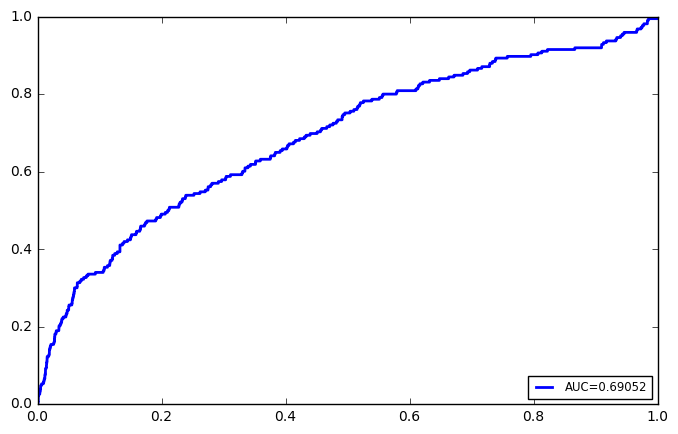

In [117]:
f, axes = plt.subplots(1, figsize=(8, 5))
lab = 'AUC=%.5f' % metrics.auc(fpr, tpr)
axes.step(fpr, tpr, lw=2,label=lab)
axes.legend(loc='lower right', fontsize='small')
plt.show()

# <span style="color:blue">Bidding Strategies</span> 

## Mcpc bidding

bid = maxEcpc * pCTR

In [156]:
adv = validation.advertiser.unique()
table = pd.DataFrame(columns=['eCPC'])
ecpcs = []
for i in range(len(adv)):
    ad = adv[i]
    df = validation[validation.advertiser == ad]
    clicks = df.click.sum()
    costs = df.payprice.sum()
    ecpcs.append(costs / clicks)
table['eCPC'] = ecpcs
maxECPC = table['eCPC'].max()

In [157]:
def maxecpc_bid_generator():
    #bid = maxEcpc * pCTR
    bids = []
    for p in pCTRval['0']:
        bid = maxECPC * p
        bids.append(bid)

    return bids

In [167]:
ecpcs = pd.DataFrame()
ecpcs['bids'] = maxecpc_bid_generator()
val_temp = pd.concat([validation, ecpcs],axis=1)


In [178]:
val = pd.read_csv('validation.csv')

data = pd.DataFrame(columns=['clicks','imps','spent','CTR','CPC','CPM'])
lists = {'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

budget = 6250000.0
imps = 0
clicks = 0
spent = 0
for i in range(0,len(pCTRval)):
    payprice = val_temp.payprice[i]
    bid = val_temp.bids[i]
    if budget < payprice:
        break
    if bid >= payprice:
        imps = imps + 1
        clicks = clicks + val_temp.click[i]
        budget = budget - payprice
        spent = spent + payprice
ctr = ((clicks / imps) * 100).round(4).astype(str)
cpm = ((spent / imps) * 1000).round(4).astype(str)
cpc = (spent / clicks).round(4).astype(str)
lists['clicks'].append(clicks)
lists['imps'].append(imps)
lists['spent'].append(spent)
lists['ctr'].append(ctr)
lists['cpc'].append(cpc)
lists['cpm'].append(cpm)

data.clicks = lists['clicks']
data.imps = lists['imps']
data.spent = lists['spent']
data.CTR = lists['ctr']
data.CPC = lists['cpc']
data.CPM = lists['cpm']
data

,clicks,imps,spent,CTR,CPC,CPM
0,117,123164,5462956,0.095,46691.9316,44355.1362
